<h1 align=center><font size = 10> Đồ án Funix </font></h1>

# Business Understanding

## Mô tả business
- Các kênh đặt phòng khách sạn trực tuyến đã làm thay đổi đáng kể khả năng đặt phòng và hành vi của khách hàng. Có một số lượng lớn các phòng bị hủy bỏ hoặc bị hủy do vắng mặt. Có nhiều lý do như thay đổi kế hoạch, xung đột lịch trình,... Điều này nên được thực hiện như một lựa chọn miễn phí để tăng trải nghiệm khách hàng hoặc với chi phí thấp nhất.

## Mục tiêu:
- Dự đoán hủy phòng có thể giúp khách sạn tối ưu hóa công suất sử dụng phòng và doanh thu. 
- Biết trước được phòng hủy sẽ quản lý và sử dụng các nguồn lực tốt hơn. Cũng như có thể kem theo các trương trình để tăng trải nghiệm khách hàng.
- Các model sẽ được đánh giá qua accuracy và f1 score

# Pipeline 

1. Đọc dữ liệu. 

2. Overview

3. EDA.

4. Tiền xử lý dữ liệu.

  - Label Encoder

  - Balancing Classes

  - Standar Scaler

  - split train test

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - Naive Bayes

  - KNN

  - Decision Tree

  - Extra Tree

  - XGB

  - Hard Voting

  - Soft Voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Tập dữ liệu chứa các thuộc tính khác nhau của chi tiết đặt phòng của khách hàng
- **Booking_ID**: Định danh duy nhất cho mỗi đặt phòng
- **no_of_adults**: Số lượng người lớn
- **no_of_children**: Số lượng trẻ em
- **no_of_weekend_nights**: Số đêm cuối tuần (thứ bảy hoặc chủ nhật) khách đã ở hoặc đặt phòng
- **no_of_week_nights**: Số đêm trong tuần (thứ hai đến thứ sáu) khách đã ở hoặc đặt phòng
- **type_of_meal_plan**: loại suất ăn khách đã đặt 
- **required_car_parking_space**: Khách hàng có cần chỗ đậu xe hay không (0 - No, 1- Yes)
- **room_type_reserved**: Loại phòng khách đã đặt. Các giá trị được mã hóa bởi INN Hotels.
- **lead_time**: Số ngày từ ngày đặt phòng tới ngày đến 
- **arrival_year**: Năm của ngày đến 
- **arrival_month**: Tháng của ngày đến
- **arrival_date**: Ngày trong tháng
- **market_segment_type**: Chỉ định phân khúc thị trường
- **repeated_guest**: Khách hàng có phải là khách hàng cũ hay không? (0 - No, 1- Yes)
- **no_of_previous_cancellations**: Số lần đặt trước mà đã bị khách hàng hủy trước lần đặt hiện tại
- **no_of_previous_bookings_not_canceled**: Số lần đặt trước mà khách hàng không hủy trước lần đặt hiện tại
- **avg_price_per_room**: Giá trung bình mỗi ngày của phòng. Giá của các phòng là linh động. (euros)
- **no_of_special_requests**: Tổng số yêu cầu đặt biệt của khách hàng (VD: Tầng cao, tầm nhìn từ phòng...)
- **booking_status**: Nhãn cho biết phòng có bị hủy hay không.

# 1. Load dữ liệu từ file CSV  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/do_an/hotel_reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
1,INN00002,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
2,INN00003,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# 2. Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
len(df[df.duplicated() == True])

0

In [6]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

- Có 19 cột, 36275 hàng.
- Không có giá trị null
- không có hàng nào bị trùng lặp
- Booking_ID không có giá trị cho model nên sẽ bị xóa

In [7]:
df = df.drop("Booking_ID", axis=1)

In [8]:
df.describe(include="all")

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


# 3. EDA

## Ma trận tương quan

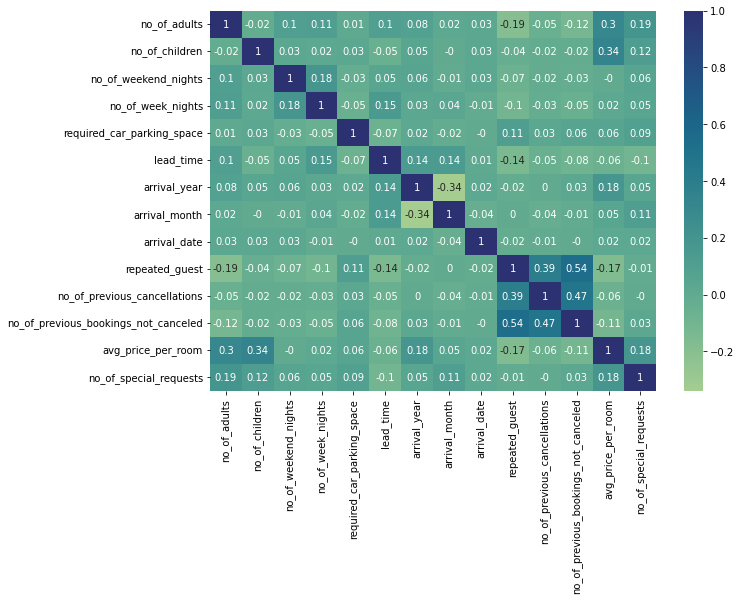

In [9]:
corr = df.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="crest");

- Nhìn vào biểu đồ ta có thể thấy rằng mối tương quan giữa các biến không được chặt chẽ. Cao nhất bằng 0.54

## Categorical Variables

In [10]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Set2')
palette = sns.color_palette('Set2')

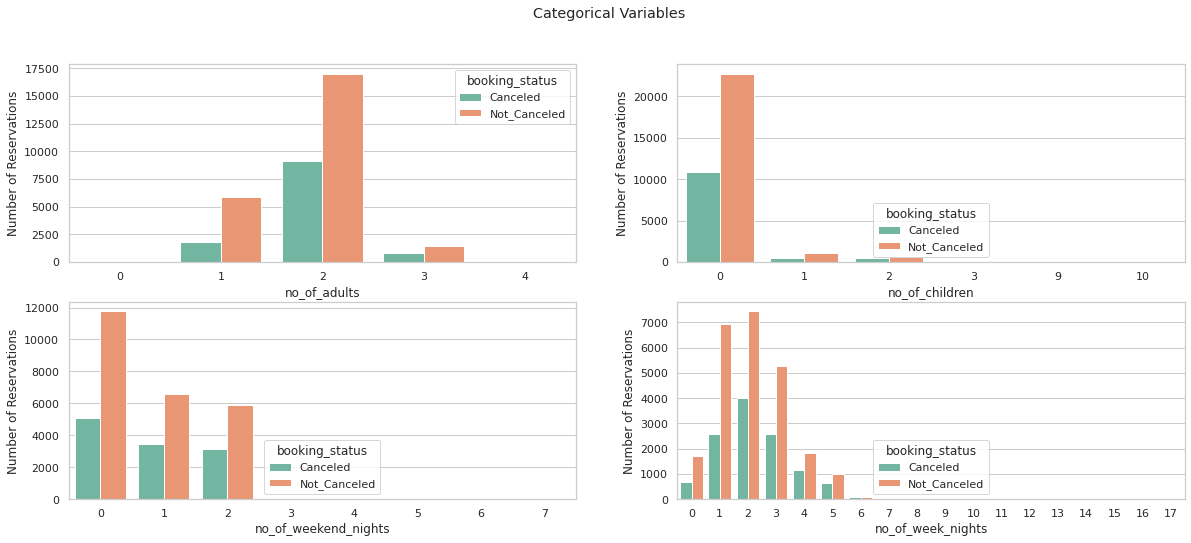

In [11]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20,8))
fig.suptitle('Categorical Variables')
cate_dict = {
    "no_of_adults":ax1,
    "no_of_children":ax2,
    "no_of_weekend_nights":ax3,
    "no_of_week_nights":ax4,
}
for key, value in cate_dict.items():
    sns.countplot(data=df, x=key, hue="booking_status", ax=value)
    value.set_ylabel("Number of Reservations")
    value.set_xlabel(f"{key}")

Nhìn vào biểu đồ ta thấy rằng:
- Đa số đơn đặt phòng cho hai người lớn và không có trẻ em. Tỷ lệ hủy cao dần khi số người tăng, cao nhất khi có 3 người lớn và hai trẻ em.
- Đơn thường được đặt vào các ngày trong tuần. Số lượng đơn sẽ giảm và tỷ lệ hủy phòng sẽ cao dần khi số đêm tăng lên.

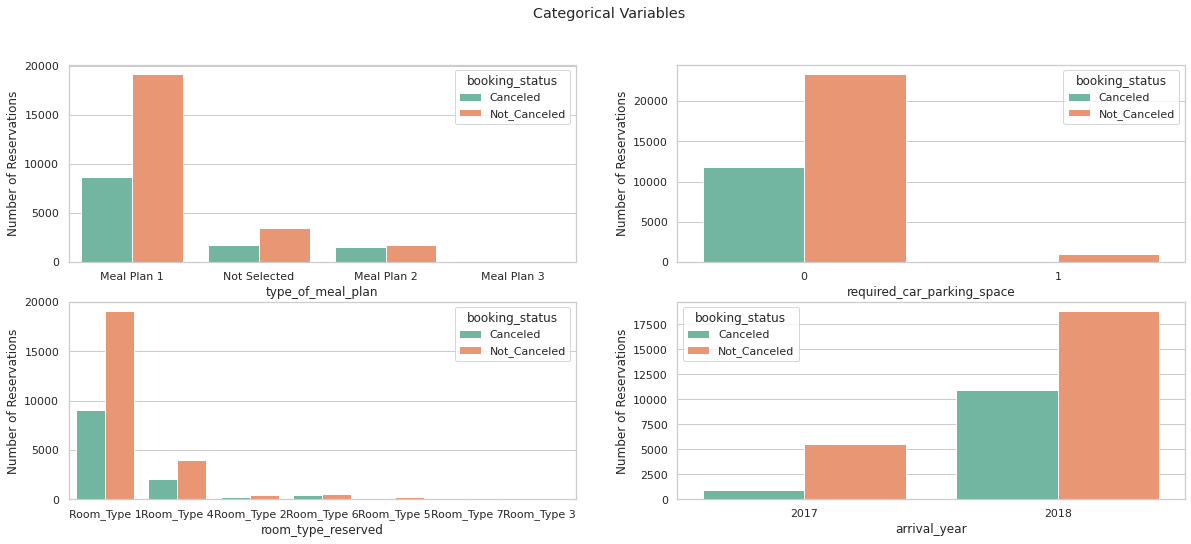

In [12]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20,8))
fig.suptitle('Categorical Variables')
cate_dict = {
    "type_of_meal_plan":ax1,
    "required_car_parking_space":ax2,
    "room_type_reserved":ax3,
    "arrival_year":ax4,
}
for key, value in cate_dict.items():
    sns.countplot(data=df, x=key, hue="booking_status", ax=value)
    value.set_ylabel("Number of Reservations")
    value.set_xlabel(f"{key}")

- Đa phần khách hàng sẽ đặt loại kế hoạch ăn 1. Những kế hoạch còn lại có ít người chọn và tỷ lệ hủy phòng cao.
- Yêu cầu bãi đỗ xe không làm ảnh hưởng nhiều đến quyết định đặt phòng của khách
- Loại phòng ưa thích và đặt nhiều nhất của khách sạn là loại 1. Loại có tỷ lệ hủy cao nhất là loại 6.
- Số lượng đặt phòng vào năm 2018 tăng đột biết so với 2017. Nhưng đồng thời tỷ lệ hủy phòng cũng cao hơn.

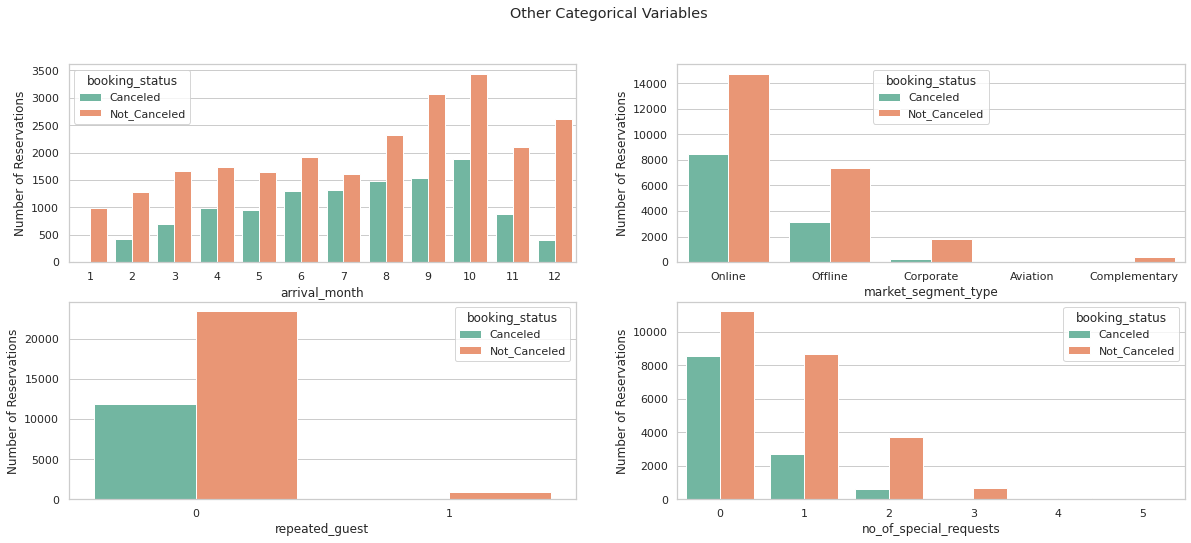

In [13]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(20,8))
fig.suptitle('Other Categorical Variables')
cate_dict = {
    "arrival_month":ax1,
    "market_segment_type":ax2,
    "repeated_guest":ax3,
    "no_of_special_requests":ax4,
}
for key, value in cate_dict.items():
    sns.countplot(data=df, x=key, hue="booking_status", ax=value)
    value.set_ylabel("Number of Reservations")
    value.set_xlabel(f"{key}");

- Số lượng đặt phòng tăng dần từ tháng 1 đến tháng 10 (cao nhất là tháng 10) và sẽ giảm dần vào các tháng sau đó. Và tủy lệ hủy phòng cao nhất vào các tháng hè, thấp nhất ở các tháng cuối và đâu năm.
- Khách hàng đặt phòng nhiều nhất ở phân khúc online đồng thời đây cũng là phân khúc có tỷ lệ hủy cao nhất. 
- Đa số khách đặt phòng là khách lần đầu.
- Tỷ lệ đặt phòng thành công sẽ cao hơn khi có nhiều yêu cầu đặt biệt.

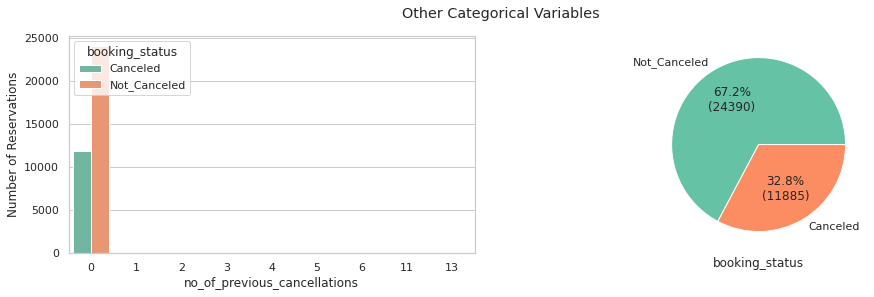

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Other Categorical Variables')
sns.countplot(data=df, x="no_of_previous_cancellations", hue="booking_status", ax=ax1)
ax1.set_ylabel("Number of Reservations")
ax1.set_xlabel("no_of_previous_cancellations")

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
tmp = df["booking_status"].value_counts()
ax2.pie(tmp,labels = tmp.index,autopct=autopct_format(tmp))
ax2.set_xlabel("booking_status");

- Khách hàng thường không bao giờ hủy phòng trước đây
- Nhìn vào biểu đồ booking_status ta thấy được rằng số đơn hàng thành công cao gấp đôi đơn bị hủy và điều này sẽ gây mất cân bằng cho bộ phân loại.

## **Continous Variables**

In [15]:
mean_lt_canceled = round(df[df["booking_status"] == "Canceled"]["lead_time"].mean(),2)
mean_lt_not_canceled = round(df[df["booking_status"] == "Not_Canceled"]["lead_time"].mean(),2)

mean_price_canceled = round(df[df["booking_status"] == "Canceled"]["avg_price_per_room"].mean(),2)
mean_price_not_canceled = round(df[df["booking_status"] == "Not_Canceled"]["avg_price_per_room"].mean(),2)

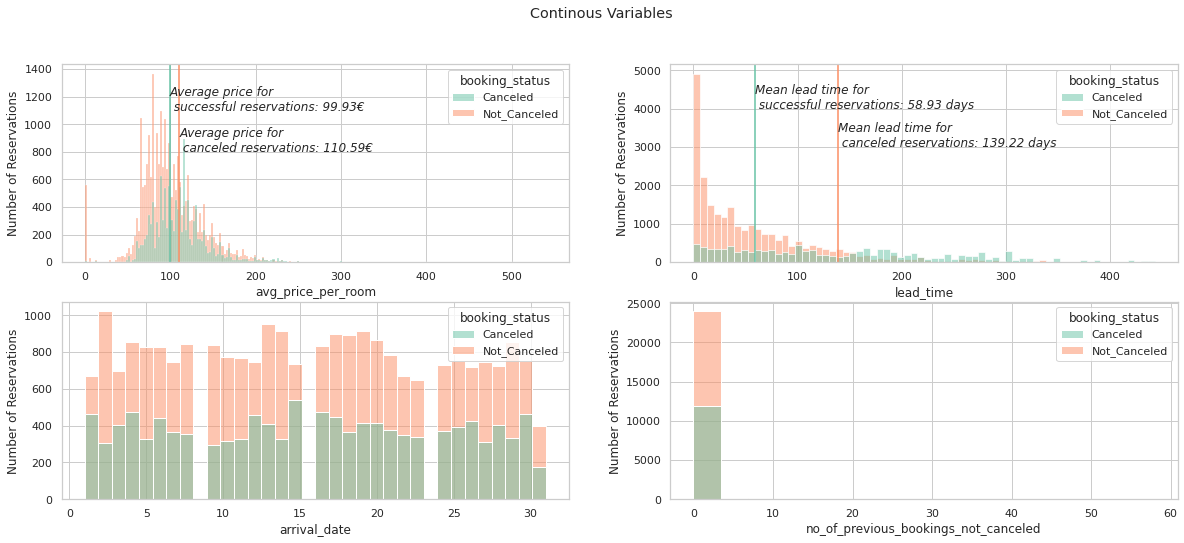

In [16]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(20,8))
fig.suptitle('Continous Variables')
continue_dict = {"avg_price_per_room":ax1,
                 "lead_time":ax2,
                 "arrival_date":ax3,
                 "no_of_previous_bookings_not_canceled":ax4}

for key, value in continue_dict.items():
    sns.histplot(data=df, x=key, hue="booking_status", ax=value)
    if key == "avg_price_per_room":
        value.axvline(x=mean_price_canceled,color=palette[1])
        value.axvline(x=mean_price_not_canceled,color=palette[0])
        value.annotate(f'Average price for \n canceled reservations: {mean_price_canceled}€', 
            xy=(mean_price_canceled, 800),
            fontstyle='italic')
        value.annotate(f'Average price for \n successful reservations: {mean_price_not_canceled}€', 
             xy=(mean_price_not_canceled, 1100),
            fontstyle='italic')
    if key == "lead_time":
        value.axvline(x=mean_lt_canceled,color=palette[1])
        value.axvline(x=mean_lt_not_canceled,color=palette[0])
        value.annotate(f'Mean lead time for \n canceled reservations: {mean_lt_canceled} days', 
            xy=(mean_lt_canceled, 3000),
            fontstyle='italic')
        value.annotate(f'Mean lead time for \n successful reservations: {mean_lt_not_canceled} days', 
            xy=(mean_lt_not_canceled, 4000),
            fontstyle='italic')
    value.set_ylabel("Number of Reservations")
    value.set_xlabel(f"{key}");

- Khi so sánh với giá trung bình đặt phòng thành công (trung bình 100€) thì giá hủy phòng sẽ cao hơn (trung bình 110€) và khi giá tăng cao hơn sẽ ít khách đặt cũng như tỷ lệ hủy cao.
- Thời gian chờ đợi càng kéo dài thì tỷ lệ hủy cũng tăng theo. Thời gian trung bình cho những đơn đặt phòng thành công là 59 ngày. Và xu hướng của khách hàng thường đặt phòng mà không mất nhiều thời gian.

# 4. Tiền xử lý dữ liệu

## Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [18]:
y = df["booking_status"]
X = df.drop("booking_status", axis=1).values

## Standar Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

## split train test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing Classes

In [21]:
# Lấy mẫu ngẫu nhiên bằng KNN
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train,y_train)

# 5. Xây dựng mô hình phân loại và đánh giá chất lượng.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
def result_plot(model, threshold=None):
    sns.set_style("white")
    y_probs = model.predict_proba(X_test)
    y_probs_train = model.predict_proba(X_train)
    if threshold:
        y_pred = (y_probs[:,1] >= threshold).astype(bool)
        y_pred_train = (y_probs_train[:,1] >= threshold).astype(bool)
    else:
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
    #confusion_matrix
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder_booking_status.classes_)

    #ROC curve
    fpr, tpr, _ = roc_curve(y_test,  y_probs[:,1])
    auc = roc_auc_score(y_test, y_probs[:,1])

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.lineplot(x=fpr, y=tpr, ax=ax1, color=palette[1])
    ax1.set_xlabel('FP rate')
    ax1.set_ylabel('TP rate')
    ax1.set_title(f'ROC AUC Score: {auc:.4%}')

    cm_display.plot(ax=ax2);
    print("Accuracy train:", accuracy_score(y_train, y_pred_train))
    print("Accuracy test:",accuracy_score(y_test, y_pred))
    print("f1 score:",f1_score(y_test,y_pred) )
    print(classification_report(y_test, y_pred))

In [23]:
f1_scores = {'train':{'NB': 0,'KNN': 0, 'DT': 0, 'ET': 0, 'XGB': 0, 'HV':0, 'SV':0},
             'test':{'NB': 0, 'KNN': 0, 'DT': 0, 'ET': 0, 'XGB': 0, 'HV':0, 'SV':0}}
accuracy_scores = {'train':{'NB': 0, 'KNN': 0, 'DT': 0, 'ET': 0, 'XGB': 0, 'HV':0, 'SV':0}, 
                  'test':{'NB': 0, 'KNN': 0, 'DT': 0, 'ET': 0, 'XGB': 0, 'HV':0, 'SV':0}}
recall_scores = {'test':{'NB': 0, 'KNN': 0, 'DT': 0, 'ET': 0, 'XGB': 0, 'HV':0, 'SV':0}}
def add_f1_accuracy(model=None, name=""):
    f1_scores["train"][name] = f1_score(y_train, model.predict(X_train))
    f1_scores["test"][name] = f1_score(y_test, model.predict(X_test))
    recall_scores["test"][name] = recall_score(y_test, model.predict(X_test))
    accuracy_scores["train"][name] = accuracy_score(y_train, model.predict(X_train))
    accuracy_scores["test"][name] = accuracy_score(y_test, model.predict(X_test))

## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

Accuracy train: 0.5665183366579715
Accuracy test: 0.42798070296347346
f1 score: 0.26313920454545453
              precision    recall  f1-score   support

           0       0.37      0.98      0.53      2416
           1       0.93      0.15      0.26      4839

    accuracy                           0.43      7255
   macro avg       0.65      0.57      0.40      7255
weighted avg       0.75      0.43      0.35      7255



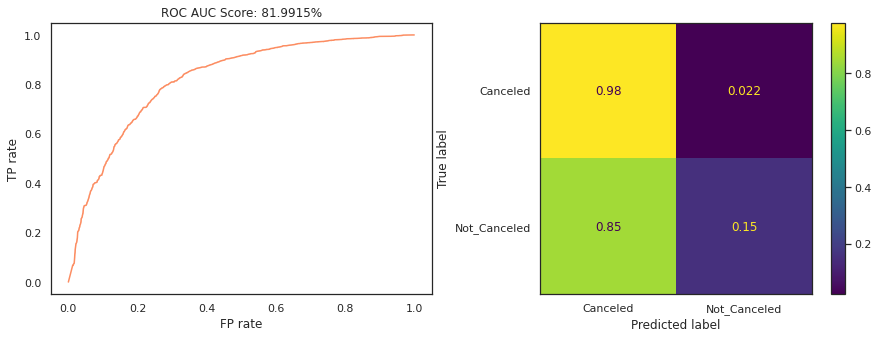

In [25]:
add_f1_accuracy(naive_bayes,"NB")
result_plot(naive_bayes)

- Đây là model rất tệ, có accuracy (42.8%) thấp hơn việc đoán. Và f1 score (26.3%) rất thấp 

## KNN (Grid Search)

In [26]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()

param_grid = {"n_neighbors": list(range(4,10)),
              "metric": ["minkowski","euclidean","manhattan"],
              "weights": ["distance", "uniform"]}
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1', cv=3)
grid_knn.fit(X_train, y_train)
best_para_knn = grid_knn.best_params_
print(best_para_knn)
print(f"socre: {grid_knn.best_score_}")

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
socre: 0.8919423513940151


+ n_neighbors: Số lượng điểm lân cận dùng để dự đoán
+ metric: Số liệu khoảng cách được sử dụng sẽ tính toán độ tương tự.
+ weights: Đánh giá trọng số
        + uniform: tất cả các điểm lân cận có giá trị như nhau
        + distance: Những điểm gần hơn sẽ có ảnh hưởng lớn hơn

Accuracy train: 0.9943736893253542
Accuracy test: 0.8603721571330117
f1 score: 0.8936482939632545
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      2416
           1       0.91      0.88      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.85      7255
weighted avg       0.86      0.86      0.86      7255



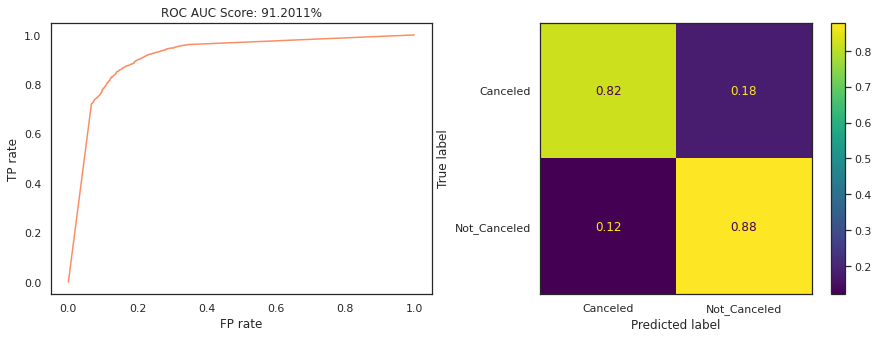

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_para_knn["n_neighbors"], metric=best_para_knn["metric"], weights=best_para_knn["weights"])
knn.fit(X_train,y_train)
add_f1_accuracy(knn,"KNN")
result_plot(knn)

- Model tốt cho việc dữ đoán khi đạt accuracy (86%) và f1 score (89.3%) cao. Nhưng nó đang bị overfitting

## Decision Tree (Grid Search)

In [28]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': range(1,10),
    'splitter': ["best", "random"],
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,10)
}

model = DecisionTreeClassifier()
grid_decision_tree = GridSearchCV(estimator=model, param_grid= param_grid, scoring='f1', cv=3)
grid_decision_tree.fit(X_train, y_train)

best_para_dt = grid_decision_tree.best_params_
print(best_para_dt)
print(f"socre: {grid_decision_tree.best_score_}")

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'best'}
socre: 0.8578756963302601


+ max_depth: Chiều sâu tối đa của cây. Nếu là None, thì các nút được mở rộng cho đến khi tất cả các lá đều thuần túy hoặc cho đến khi tất cả các lá chứa ít hơn mẫu min_samples_split. Model càng sâu thì cang dễ overfiting và ngược lại
+ splitter: Chiến lược phân chia tại mỗi node.
+ min_samples_split: số lượng mẫu tối thiểu cần thiết để tách 1 node bên trong. Nếu có giá trị cao sẽ ngăn cho model overfiting. Nhưng nếu quá cao sẽ dẫn tới underfiting.
+ min_samples_leaf: số lượng mẫu tối thiều cần có tại 1 node lá. Dùng để kiểm soát overfiting. Nếu giá trị quá nhỏ sẽ dẫn tới overfiting 

Accuracy train: 0.8657101938519769
Accuracy test: 0.8609235010337698
f1 score: 0.8948629780139628
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2416
           1       0.90      0.89      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.85      0.84      7255
weighted avg       0.86      0.86      0.86      7255



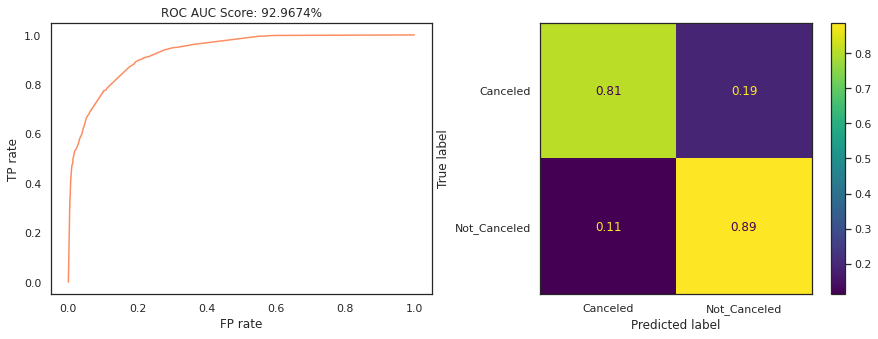

In [29]:
decision_tree = DecisionTreeClassifier(splitter=best_para_dt["splitter"], 
                                       max_depth= best_para_dt["max_depth"], 
                                       min_samples_leaf=best_para_dt["min_samples_leaf"],
                                       min_samples_split=best_para_dt["min_samples_split"])
decision_tree.fit(X_train, y_train)
add_f1_accuracy(decision_tree,"DT")
result_plot(decision_tree)

- Model có accuracy (86.1%) và f1 score (89.5%) đã giảm overfitting. Nhưng vẫn chưa đạt yêu cầu

In [30]:
feature_imp = pd.Series(decision_tree.feature_importances_, index = df.drop("booking_status", axis = 1).columns).sort_values(ascending = False)
print("the most important variables of the model")
feature_imp

the most important variables of the model


lead_time                               0.409179
market_segment_type                     0.173243
no_of_special_requests                  0.162003
avg_price_per_room                      0.109119
arrival_month                           0.047576
no_of_adults                            0.022585
no_of_weekend_nights                    0.022570
no_of_week_nights                       0.013284
arrival_date                            0.013228
required_car_parking_space              0.012003
arrival_year                            0.009808
type_of_meal_plan                       0.002981
room_type_reserved                      0.001703
repeated_guest                          0.000394
no_of_children                          0.000323
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

## ExtraTree

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
param_grid = {
    'max_features': ["sqrt", "log2", 5, 6, 7, 8, 9],
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [100, 200, 250, 260, 270],
    'max_depth': [1, 2, 3, 4, 5]
}

model = ExtraTreesClassifier()
grid_extra_tree = GridSearchCV(estimator=model, param_grid= param_grid, scoring='f1', cv=3)
grid_extra_tree.fit(X_train, y_train)

best_para_et = grid_extra_tree.best_params_
print(best_para_et)
print(f"socre: {grid_extra_tree.best_score_}")


{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 8, 'n_estimators': 250}
socre: 0.8054594307561264


- **max_features:** số lượng tính năng được xem xét tại mỗi nút quyết định. Giá trị càng cao càng làm cho độ lệch của model thấp. Nếu quá cao thì sẽ làm mất tính ngẫu nhiên.
- **min_samples_leaf**: số lượng mẫu tối thiểu cần có tại một nút lá. Giá trị càng cao model càng có ít khả năng overfit. Giá trị nhỏ làm cho model sâu hơn.
- **n_estimators**: là số lượng cây trong rừng. Giá trị càng cao thì phương sai của model càng thấp 
- **max_depth**: Độ sâu tối đa của decision tree

Accuracy train: 0.8008797503963991
Accuracy test: 0.8027567195037905
f1 score: 0.8461124852134637
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      2416
           1       0.88      0.81      0.85      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.80      0.79      7255
weighted avg       0.81      0.80      0.81      7255



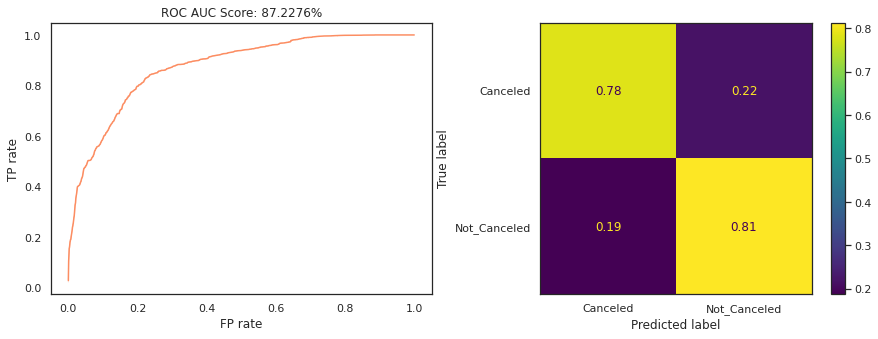

In [32]:
extraTree = ExtraTreesClassifier(min_samples_leaf=best_para_et["min_samples_leaf"], max_features=best_para_et["max_features"], n_estimators=best_para_et["n_estimators"],
                                 max_depth=best_para_et["max_depth"])
extraTree.fit(X_train, y_train)
add_f1_accuracy(extraTree, "ET")
result_plot(extraTree)

- Model lần này đã không cải thiện về cả accuracy (80.3%) và f1 socre (84.6%) so với các model trước. 

In [33]:
feature_imp = pd.Series(extraTree.feature_importances_, index = df.drop("booking_status", axis = 1).columns).sort_values(ascending = False)
print("the most important variables of the model")
feature_imp

the most important variables of the model


lead_time                               0.483533
no_of_special_requests                  0.194827
arrival_year                            0.114849
market_segment_type                     0.066622
arrival_month                           0.053186
avg_price_per_room                      0.024312
repeated_guest                          0.021705
required_car_parking_space              0.012184
no_of_adults                            0.010572
type_of_meal_plan                       0.006761
no_of_weekend_nights                    0.004104
room_type_reserved                      0.003344
no_of_week_nights                       0.002068
arrival_date                            0.001650
no_of_previous_bookings_not_canceled    0.000124
no_of_children                          0.000113
no_of_previous_cancellations            0.000046
dtype: float64

## Model XGB (Grid Search)

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier()

param_grid = {"learning_rate": [0.05, 0.1, 0.2], "max_depth": [7, 8, 9, 10, 11], "n_estimators": [230, 240, 250], 'subsample':[0.5, 0.6, 0.7, 1]}

grid_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3)
grid_xgb.fit(X_train, y_train)

best_para_xgb = grid_xgb.best_params_
print(best_para_xgb)
print(f"socre: {grid_xgb.best_score_}")

{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 250, 'subsample': 1}
socre: 0.9156771130862579


+ learning_rate: Tốc độ học. Ngăn cho model quá khớp
+ max_depth: Độ sâu tối đa của decision tree
+ n_estimators: Số lượng cây
+ subsample: Số lượng mẫu ngẫu nhiên khi xây dựng tree

Accuracy train: 0.9763694951664876
Accuracy test: 0.9032391454169538
f1 score: 0.927807486631016
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2416
           1       0.92      0.93      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.89      0.89      7255
weighted avg       0.90      0.90      0.90      7255



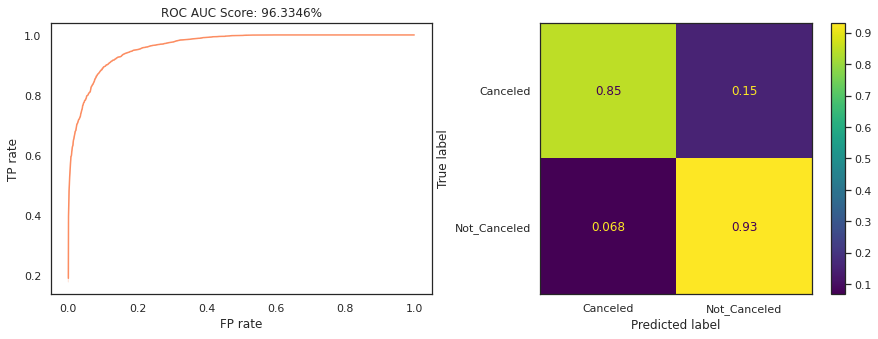

In [35]:
xgb = XGBClassifier(learning_rate=best_para_xgb["learning_rate"], max_depth=best_para_xgb["max_depth"], 
                    n_estimators=best_para_xgb["n_estimators"], subsample=best_para_xgb['subsample'])
xgb.fit(X_train, y_train)
add_f1_accuracy(xgb, "XGB")
result_plot(xgb)

- Model có độ chính xác cao accuracy (90.3%) và f1 score (92.7%). Đây là model tốt nhất trong các model

In [36]:
feature_imp = pd.Series(xgb.feature_importances_, index = df.drop("booking_status", axis = 1).columns).sort_values(ascending = False)
print("the most important variables of the model")
feature_imp

the most important variables of the model


market_segment_type                     0.268628
no_of_special_requests                  0.157001
required_car_parking_space              0.144213
repeated_guest                          0.065089
lead_time                               0.064986
arrival_year                            0.056243
arrival_month                           0.041972
no_of_adults                            0.041823
avg_price_per_room                      0.028803
no_of_week_nights                       0.026774
no_of_weekend_nights                    0.025966
type_of_meal_plan                       0.018973
arrival_date                            0.017502
room_type_reserved                      0.015888
no_of_children                          0.013376
no_of_previous_cancellations            0.006533
no_of_previous_bookings_not_canceled    0.006230
dtype: float32

# Soft Voting

In [37]:
from sklearn.ensemble import VotingClassifier

In [64]:
np.random.seed(42)
clf_dt = DecisionTreeClassifier(splitter=best_para_dt["splitter"], max_depth= best_para_dt["max_depth"], 
                                min_samples_leaf=best_para_dt["min_samples_leaf"],
                                min_samples_split=best_para_dt["min_samples_split"],)
clf_et = ExtraTreesClassifier(min_samples_leaf=best_para_et["min_samples_leaf"], max_features=best_para_et["max_features"], n_estimators=best_para_et["n_estimators"],
                              max_depth=best_para_et["max_depth"])
clf_xgb = XGBClassifier(learning_rate=best_para_xgb["learning_rate"], max_depth=best_para_xgb["max_depth"], 
                        n_estimators=best_para_xgb["n_estimators"], subsample=best_para_xgb['subsample'])

estimators = [("dt", clf_dt), ("et", clf_et), ("xgb", clf_xgb)]
param_grid = {"estimators": [estimators],
              "weights": [None ,[1,2,3], [2,1,3], [1,1,2]]}

In [65]:
vote_soft = VotingClassifier(estimators=estimators, voting="soft")
vote_cv_soft = GridSearchCV(estimator=vote_soft,param_grid=param_grid, scoring='f1', cv=3)
vote_cv_soft.fit(X_train, y_train)
print(vote_cv_soft.best_params_)

{'estimators': [('dt', DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=8)), ('et', ExtraTreesClassifier(max_depth=5, max_features=9, min_samples_leaf=8,
                     n_estimators=250)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...))], 'weights': [1, 2, 3]

Accuracy train: 0.9595928597002711
Accuracy test: 0.8981392143349414
f1 score: 0.9237594140101104
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2416
           1       0.92      0.93      0.92      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



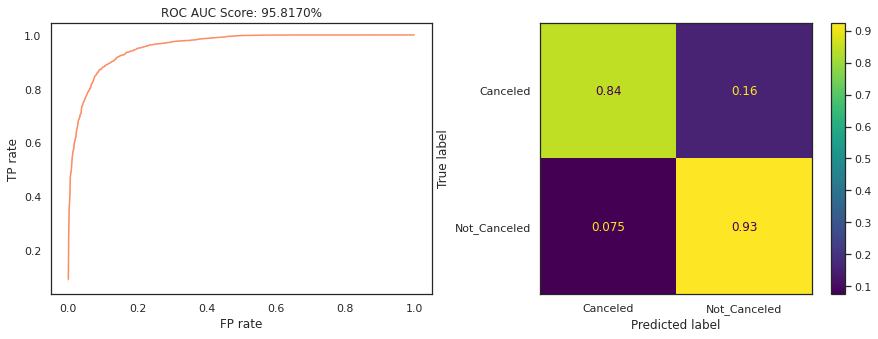

In [66]:
add_f1_accuracy(vote_cv_soft, "SV")
result_plot(vote_cv_soft)

# Hard Voting

In [67]:
np.random.seed(42)

vote_hard = VotingClassifier(estimators=estimators, voting="hard")
vote_cv_hard = GridSearchCV(estimator=vote_hard,param_grid=param_grid, scoring='f1', cv=3)
vote_cv_hard.fit(X_train, y_train)
add_f1_accuracy(vote_cv_hard, "HV")
print(vote_cv_hard.best_params_)

{'estimators': [('dt', DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=8)), ('et', ExtraTreesClassifier(max_depth=5, max_features=9, min_samples_leaf=8,
                     n_estimators=250)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...))], 'weights': [1, 2, 3]

In [68]:
y_pred = vote_cv_hard.predict(X_test)
y_pred_train = vote_cv_hard.predict(X_train)
print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:",accuracy_score(y_test, y_pred))
print("f1 score:",f1_score(y_test,y_pred) )
print(classification_report(y_test, y_pred))

Accuracy train: 0.946933660682318
Accuracy test: 0.8851826326671262
f1 score: 0.9121215318071526
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2416
           1       0.93      0.89      0.91      4839

    accuracy                           0.89      7255
   macro avg       0.87      0.88      0.87      7255
weighted avg       0.89      0.89      0.89      7255



# Dataframe mô tả kết quả

In [69]:
result = {"Algorithm": ["Naive Bayes","KNN", "Decision Tree", "Extra Tree", "XGBoost", 'Hard Voting', 'Soft Voting'],
           "accuracy-training": list(accuracy_scores["train"].values()),
           "F1-score-traning": list(f1_scores["train"].values()),
           "accuracy-testing": list(accuracy_scores["test"].values()),
           "F1-score-testing": list(f1_scores["test"].values()),
           "Recall-score-testing": list(recall_scores["test"].values())}
result_df = pd.DataFrame(result)
result_df.sort_values(by="Recall-score-testing",ascending=False)

,Algorithm,accuracy-training,F1-score-traning,accuracy-testing,F1-score-testing,Recall-score-testing
4,XGBoost,0.976369,0.976372,0.903239,0.927807,0.932217
6,Soft Voting,0.959593,0.959607,0.898139,0.923759,0.925191
5,Hard Voting,0.946934,0.945252,0.885183,0.912122,0.893366
2,Decision Tree,0.865710,0.869731,0.860924,0.894863,0.887373
1,KNN,0.994374,0.994375,0.860372,0.893648,0.879521
3,Extra Tree,0.800880,0.801499,0.802757,0.846112,0.812978
0,Naive Bayes,0.566518,0.255469,0.427981,0.263139,0.153131


- Model có Recall-score-testing cao nhất sẽ được chọn là XGBoost với accuracy và f1 score trên tập test lần lược là 90.3% và 92.7% phù hợp với bài toán.